Slacks post: Friday 29th April 2022.

Checking wall-particle interactions for potentials available under fix/wall-region, LAMMPS. 

url: https://docs.lammps.org/fix_wall_region.html


For water, the LJ potential paramters are $σ = 2.725 \left( Å \right)$ and $\epsilon = 4.9115 \left( \times 10^{-21} J \right)$. 

url: https://link.springer.com/article/10.1007/s00707-004-0134-x 

$r$ is the distance between two interacting particles, 

$\epsilon$ is the depth of the potential well (usually referred to as 'dispersion energy'), and 

$\sigma$ is the distance at which the particle-particle potential energy $E$ is zero (often referred to as 'size of the particle'). 

url: https://en.wikipedia.org/wiki/Lennard-Jones_potential 

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [230]:
eps = 4.9115 #*(10^-21) # J
sig = 2.725 # Angstrom

For style lj93, the energy $E$ is given by the 9/3 potential: 

$E = \epsilon \left[ \frac{2}{15} \left(\frac{\sigma}{r} \right)^9 - \left(\frac{\sigma}{r} \right)^3 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 0 = \left[ 9\times\frac{2}{15} \left(\frac{\sigma}{r} \right)^{10} - 3\times\left(\frac{\sigma}{r} \right)^4 \right] \quad \implies \quad 9\times\frac{2}{15} \left(\frac{\sigma}{r} \right)^{10} = 3\times\left(\frac{\sigma}{r} \right)^4 \quad \implies \quad \left(\frac{\sigma}{r} \right)^{6} = \frac{3\times15}{2\times9}$

$r_{min} = \frac{5}{2}^{\left(\frac{1}{6}\right)}σ$

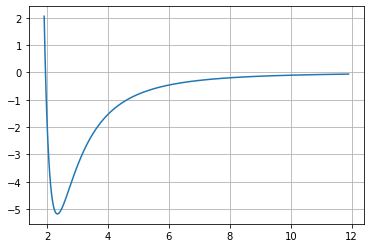

In [240]:
r_min = ((5/2)**(1/6))*sig
distance = np.linspace(0.60*r_min, 3.75*r_min, 1000, False)
LJ93 = np.zeros(len(distance))
index = 0
for r in distance:
  LJ93[index] = eps*(((2/15)*((sig/r)**9))-((sig/r)**3))
  index = index + 1
plt.plot(distance, LJ93)
plt.grid()

For style lj126, the energy $E$ is given by the 12/6 potential:

$E = 4\epsilon \left[\left(\frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r} \right)^6 \right] \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 0 = \left[ 12\times\left(\frac{\sigma}{r} \right)^{13} - 6\times\left(\frac{\sigma}{r} \right)^7 \right]  \quad \implies \quad 12\left(\frac{\sigma}{r} \right)^{13} = 6\times\left(\frac{\sigma}{r} \right)^7 \quad \implies \quad \left(\frac{\sigma}{r} \right)^{6} = \frac{6}{12}$

$r_{min} = 2^{\frac{1}{6}}σ$

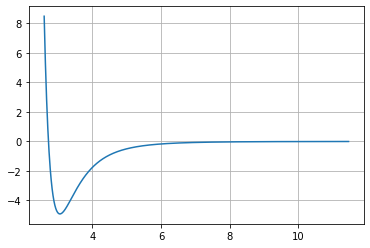

In [241]:
r_min = (2**(1/6)) * sig 
distance = np.linspace(0.85*r_min, 3.75*r_min, 1000, False)
LJ126 = np.zeros(len(distance))
index = 0
for r in distance:
  LJ126[index] = 4*eps*(((sig/r)**12)-((sig/r)**6))
  index = index + 1
plt.plot(distance, LJ126)
plt.grid()

For style wall/lj1043, the energy $E$ is given by the 10/4/3 potential:

$E = 2π\epsilon \left[\frac{2}{5} \left(\frac{\sigma}{r} \right)^{10} - \left(\frac{\sigma}{r} \right)^4 - \frac{\sqrt{2}σ^3}{3\left( r + \left( \frac{0.61}{\sqrt{2}}\right)\sigma\right)^3}\right]          \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 0 = \left[10\times\frac{2}{5} \left(\frac{\sigma}{r} \right)^{11} - 4×\left(\frac{\sigma}{r} \right)^5 + 3\times\frac{\sqrt{2}σ^3}{3\left( r + \left( \frac{0.61}{\sqrt{2}}\right)\sigma\right)^4}\right]$

$r_{min} = 2.73946825$, see plot bellow 

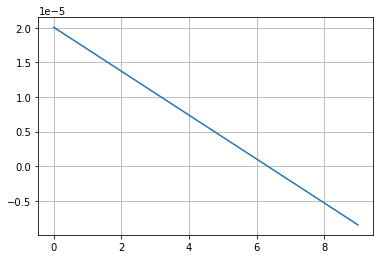

In [347]:
dE = []
R = np.linspace(2739.4665, 2739.470, 10)
for rr in R: 
  r = rr / 1000
  dummy = 10*(2/5)*((sig/r)**11) - 4*((sig/r)**5) + 3*(math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**4))
  dE.append(dummy)
plt.plot(dE)
plt.grid()

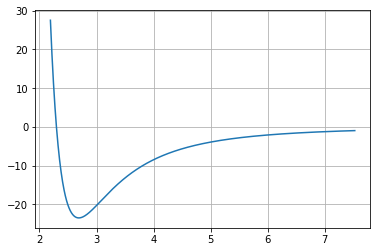

In [348]:
r_min = 2.73946825
distance = np.linspace(0.80*r_min, 2.75*r_min, 1000, False)
LJ1043 = np.zeros(len(distance))
index = 0
for r in distance:
  LJ1043[index] = 2*(math.pi)*eps*((2/5)*((sig/r)**10) - ((sig/r)**4) - ((math.sqrt(2)*(sig**3)) / (3*((r + (0.61/math.sqrt(2))*sig)**3))))
  index = index + 1
plt.plot(distance, LJ1043)
plt.grid()

For style wall/harmonic, the energy $E$ is given by a harmonic spring potential (the distance parameter is ignored):

$E = ϵ \left( r - r_c \right)^2          \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad 2\times\left( r - r_c \right) = 0 \quad \implies \quad r_{min} = r_c \quad \cdot\cdot\cdot\cdot \quad$ ***arbitrary***

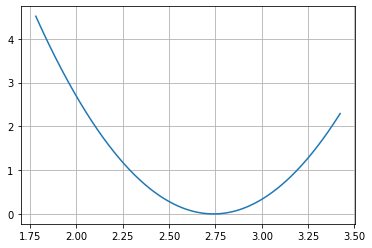

In [357]:
r_min = 2.73946825
rc = r_min
distance = np.linspace(0.65*r_min, 1.25*r_min, 1000, False)
harm = np.zeros(len(distance))
index = 0
for r in distance:
  harm[index] = eps*((r - rc)**2)
  index = index + 1
plt.plot(distance, harm)
plt.grid()

For style wall/morse, the energy $E$ is given by the Morse potential:

$E = D_0 \left[ e^{-2α\left( r - r_0 \right)} - 2e^{-α\left( r - r_0 \right)} \right]          \quad \quad$ for $\quad \quad$ $r < r_c$

The minimum of $E $ is located at:

$\frac{dE}{dr} = 0 \quad \implies \quad D_0 \left[ {-2α}e^{-2α\left( r - r_0 \right)} +2αe^{-α\left( r - r_0 \right)} \right] = 0 \quad \implies \quad r_{min} = r_0 \quad \cdot\cdot\cdot\cdot \quad$ ***arbitrary***

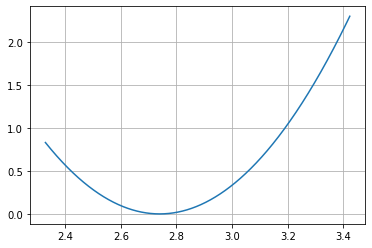

In [361]:
r_min = 2.73946825
r_0 = r_min
distance = np.linspace(0.85*r_min, 1.25*r_min, 1000, False)
morse = np.zeros(len(distance))
D_0 = eps #depth of the potential (energy units)
alpha = sig #width parameter (1/distance units)
index = 0
for r in distance:
  morse[index] = eps*((r - rc)**2)
  index = index + 1
plt.plot(distance, morse)
plt.grid()